In [2]:
import wandb
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
wandb.login()

wandb: Currently logged in as: emiel-witting (fsoconut) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [4]:
api = wandb.Api()

In [5]:
run = api.run("fsoconut/generative-modelling/xtp8u6e7")
history = run.history()

In [10]:
df = history[['Training/grad_ratios_minimum', 'Training/loss_gen']]
df = df.rename(columns={'Training/grad_ratios_minimum': 'Ratio', 'Training/loss_gen': 'Loss'})

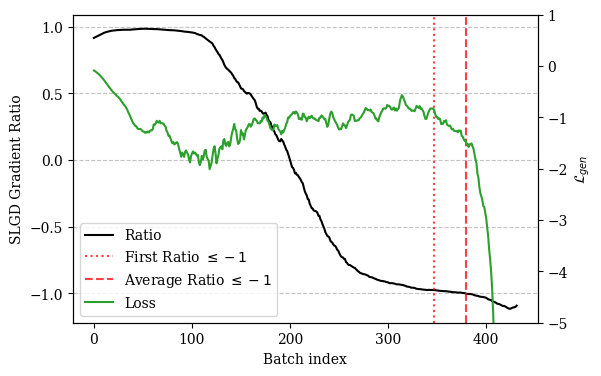

In [ ]:
plt.rcParams['font.family'] = 'serif'

fig, ax1 = plt.subplots(figsize=(6,4))
ax2 = ax1.twinx()

# Plot loss on primary y-axis
ratio = df['Ratio'].values 
ratio_smooth_window = 25
ratio_smooth = np.convolve(ratio, np.ones(ratio_smooth_window)/ratio_smooth_window, mode='valid')
ax1.plot(ratio_smooth, label='Ratio', color='black')
# ax1.plot(ratio, label='Ratio', color='black', alpha=0.2)
ax1.set_ylabel('SLGD Gradient Ratio')

# Create twin axis for loss
loss = df['Loss'].values
loss_smooth_window = 25
loss_smooth = np.convolve(loss, np.ones(loss_smooth_window)/loss_smooth_window, mode='valid')
ax2.plot(loss_smooth, '-', label='Loss', color='tab:green')
ax2.set_ylim(-5,1)
ax2.set_ylabel('$\mathcal{L}_{gen}$')

# Intersection for unsmoothed ratio < 1
ratio_threshold = -1
ratio_threshold_index = np.where(ratio < ratio_threshold)[0][0]
ax1.axvline(ratio_threshold_index, color='red', linestyle='dotted', alpha=0.75, label='First Ratio $\leq -1$')

# Intersection of ratio<-1
ratio_threshold = -1
ratio_threshold_index = np.where(ratio_smooth < ratio_threshold)[0][0]
ax1.axvline(ratio_threshold_index, color='red', linestyle='--', alpha=0.75, label='Average Ratio $\leq -1$')
# ax1.axhline(ratio_threshold, color='black', linestyle='--', alpha=0.5)
ax1.grid(True, which='major', linestyle='--', alpha=0.75, axis='y')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower left')
ax1.set_xlabel('Batch index')

fig.savefig('ratio_plot.png', dpi=300)
plt.show()